In [1]:
import sys
import os

sys.path.insert(0,'../..')
sys.path.insert(0,'../../py')
import parameters
import utilities
import spectrogram_utilities
import output_utilities
import spectrogram_output_visualiser

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats
from sklearn import preprocessing

In [2]:
# matplotlib.get_backend()
%matplotlib inline

awd_event = 1
site = parameters.sites[0]

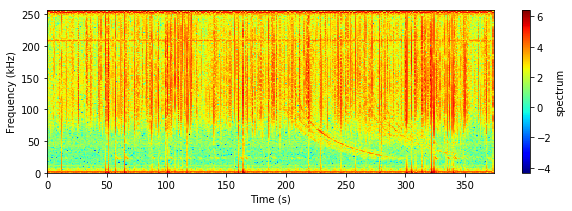

(257, 374)
['214' '219' '221' '223' '228' '230' '236' '279' '285' '293' '295' '299'
 '302']
[[19, 128, 188, 276], [19, 128, 193, 281], [19, 128, 195, 283], [19, 128, 197, 285], [19, 128, 202, 290], [19, 128, 204, 292], [19, 128, 210, 298], [19, 128, 253, 341], [19, 128, 259, 347], [19, 128, 267, 355], [19, 128, 269, 357], [19, 128, 273, 361], [19, 128, 276, 364]]


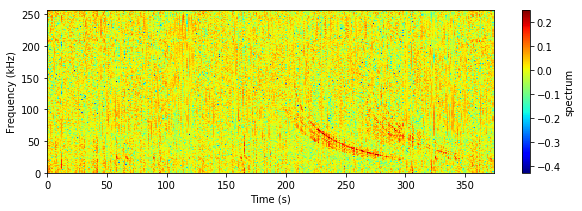

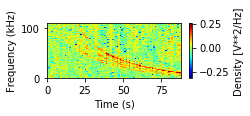

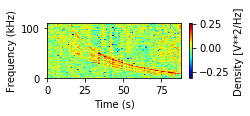

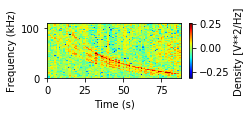

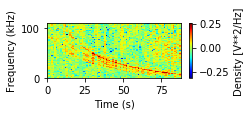

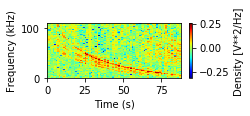

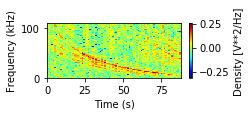

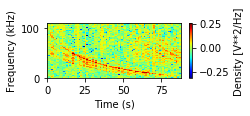

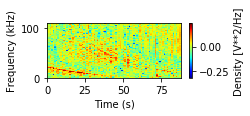

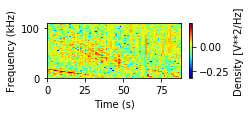

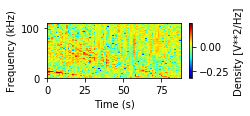

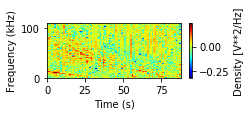

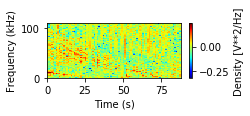

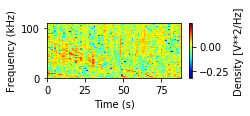

In [4]:
file = utilities.random_file(awd_event, site)
# file = '2013-06-09UT17:21:33.01047109.marion.vr2'


indices, time, freq , spectrogram = spectrogram_output_visualiser.spectrogram_and_output(awd_event,site, file,output=False)
spectrogram_utilities.spectrogram_plot(spectrogram, x_label='Time (s)', y_label='Frequency (kHz)',size=(10,3))


indices, spectrogram, specs_cuts = spectrogram_output_visualiser.whistler_cut(awd_event, site, file, 10, output=False)

print(spectrogram.shape)
indices = np.asarray(indices)
print(indices[:,0])
print(specs_cuts)

spectrogram_utilities.spectrogram_plot(spectrogram, x_label='Time (s)', y_label='Frequency (kHz)',size=(10,3))

for whistler in specs_cuts:
    fig = plt.figure(figsize=(3,1))
    img = plt.pcolormesh(spectrogram[whistler[0]:whistler[1],whistler[2]:whistler[3]], cmap='jet')
    fig.colorbar(mappable=img, label='Density [V**2/Hz]')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (kHz)')
    plt.show()